Classificação de Texto Multilabel

José Augusto de Almeida Neto

## Importar bibliotecas

In [1]:
import os.path
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [2]:
labels = ['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']

# Logistic Regression

## Carregar datasets

In [7]:
# Carregar dataset
df_fold1 = pd.read_csv('../../datasets/dataset-fold_1-multilabel.csv', encoding='utf-8')
df_fold2 = pd.read_csv('../../datasets/dataset-fold_2-multilabel.csv', encoding='utf-8')
df_fold3 = pd.read_csv('../../datasets/dataset-fold_3-multilabel.csv', encoding='utf-8')
df_fold4 = pd.read_csv('../../datasets/dataset-fold_4-multilabel.csv', encoding='utf-8')
df_fold5 = pd.read_csv('../../datasets/dataset-fold_5-multilabel.csv', encoding='utf-8')

In [4]:
# Gerar listas de métricas
accuracies = []
f1_score_list_macro = []
precision_list_macro = []
recall_list_macro = []
f1_score_list_micro = []
precision_list_micro = []
recall_list_micro = []

## 1° Fold

In [5]:
# Dividir o dataset
df = pd.concat([df_fold2, df_fold3, df_fold4, df_fold5])
train_data = df.dropna()
test_data = df_fold1.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [6]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Criar e treinar modelo
model = OneVsRestClassifier(LogisticRegression(C=10.0, max_iter=1000, penalty='l1', solver='liblinear', multi_class='ovr'))
model.fit(X_train_tfidf, y_train)

c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression(C=10.0, max_iter=1000,
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear'))

In [29]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [30]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 1° Fold:", accuracy)
print("F1 Score Macro do 1° Fold:", f1_score_macro)
print("Precisão Macro do 1° Fold:", precision_macro)
print("Revocação Macro do 1° Fold:", recall_macro)
print("F1 Score Micro do 1° Fold:", f1_score_micro)
print("Precisão Micro do 1° Fold:", precision_micro)
print("Revocação Micro do 1° Fold:", recall_micro)

Acurácia do 1° Fold: 0.6925
F1 Score Macro do 1° Fold: 0.8223216270615505
Precisão Macro do 1° Fold: 0.8940639683025697
Revocação Macro do 1° Fold: 0.8234302385633991
F1 Score Micro do 1° Fold: 0.889641164522681
Precisão Micro do 1° Fold: 0.8824714573539288
Revocação Micro do 1° Fold: 0.8969283276450511


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.90      0.89      0.89       269
      bebida       0.83      0.90      0.87        82
      comida       0.91      0.91      0.91       418
       geral       0.70      0.83      0.76       206
 localização       0.91      0.97      0.94        30
      outros       1.00      0.18      0.31        22
       preço       0.94      0.97      0.95       161
     serviço       0.97      0.93      0.95       277

   micro avg       0.88      0.90      0.89      1465
   macro avg       0.89      0.82      0.82      1465
weighted avg       0.89      0.90      0.89      1465
 samples avg       0.86      0.89      0.86      1465



c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

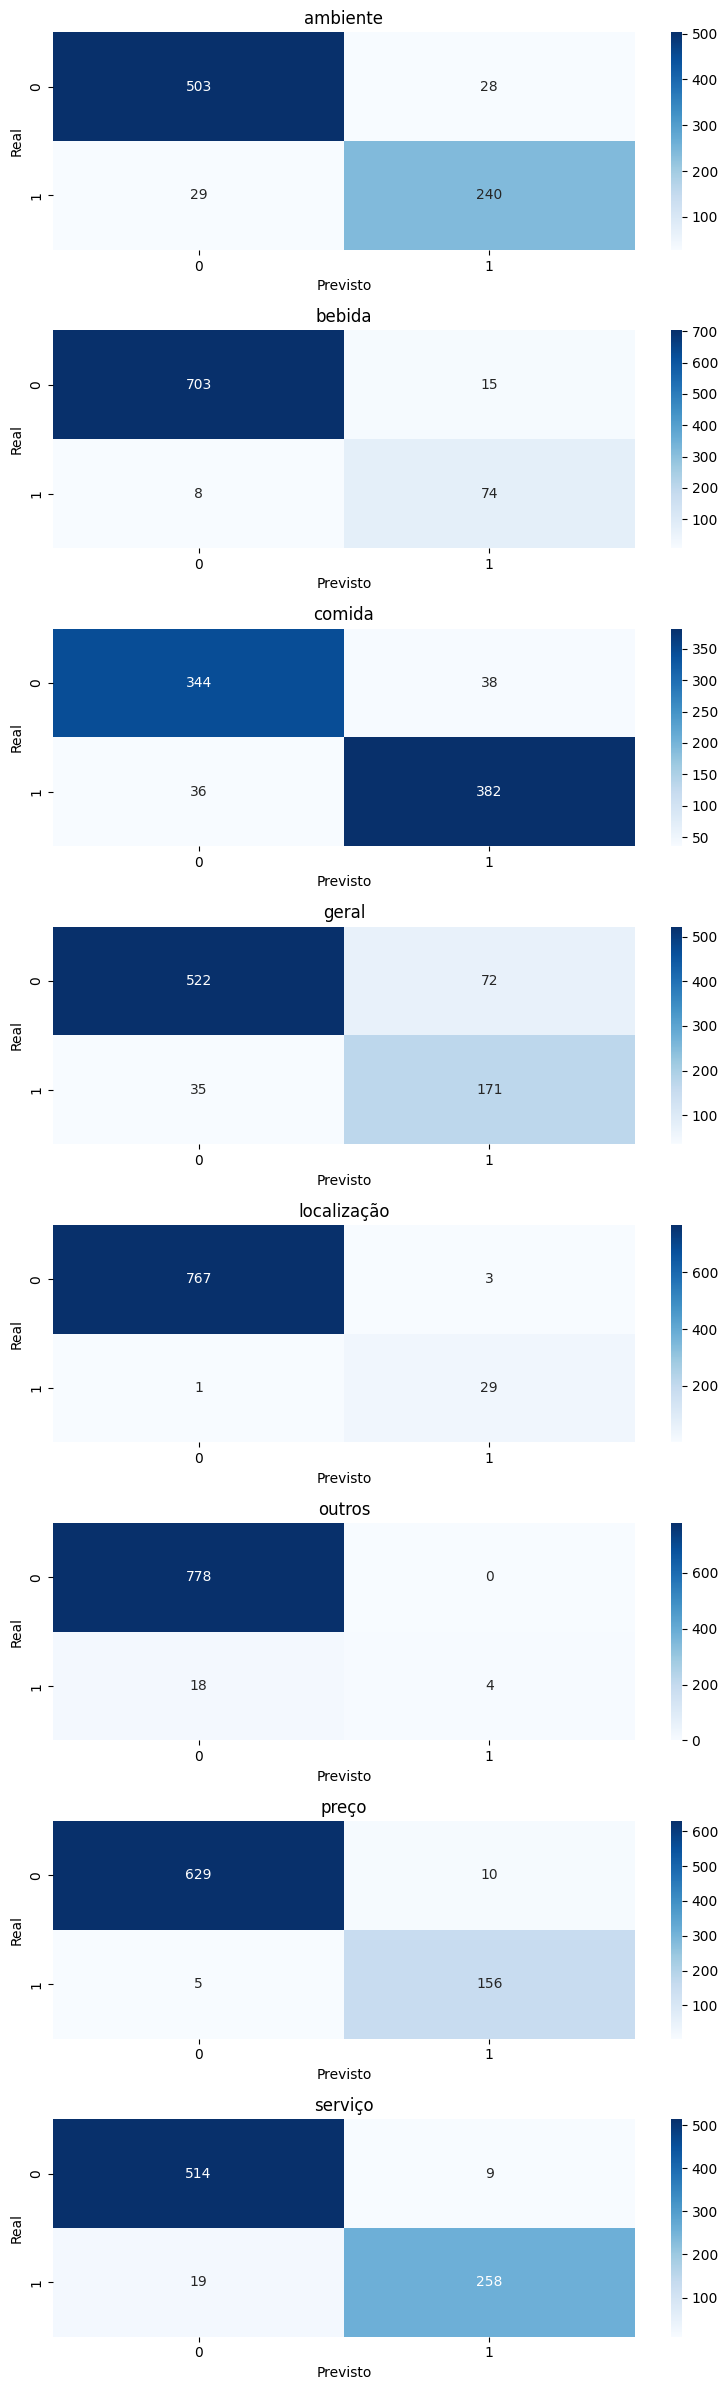

In [34]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## 2° Fold

In [35]:
# Dividir o dataset
df = pd.concat([df_fold1, df_fold3, df_fold4, df_fold5])
train_data = df.dropna()
test_data = df_fold2.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [36]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [37]:
# Criar e treinar modelo
model = OneVsRestClassifier(LogisticRegression(C=10.0, max_iter=1000, penalty='l1', solver='liblinear', multi_class='ovr'))
model.fit(X_train_tfidf, y_train)

c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression(C=10.0, max_iter=1000,
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear'))

In [38]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [39]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 2° Fold:", accuracy)
print("F1 Score Macro do 2° Fold:", f1_score_macro)
print("Precisão Macro do 2° Fold:", precision_macro)
print("Revocação Macro do 2° Fold:", recall_macro)
print("F1 Score Micro do 2° Fold:", f1_score_micro)
print("Precisão Micro do 2° Fold:", precision_micro)
print("Revocação Micro do 2° Fold:", recall_micro)

Acurácia do 2° Fold: 0.6975
F1 Score Macro do 2° Fold: 0.8034576156209097
Precisão Macro do 2° Fold: 0.8155540916443949
Revocação Macro do 2° Fold: 0.8104095619509125
F1 Score Micro do 2° Fold: 0.8881262868908717
Precisão Micro do 2° Fold: 0.8814713896457765
Revocação Micro do 2° Fold: 0.8948824343015215


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.90      0.89      0.90       241
      bebida       0.87      0.82      0.84        72
      comida       0.90      0.95      0.93       401
       geral       0.75      0.80      0.78       243
 localização       0.70      0.91      0.79        33
      outros       0.50      0.21      0.29        24
       preço       0.94      0.97      0.95       152
     serviço       0.96      0.94      0.95       280

   micro avg       0.88      0.89      0.89      1446
   macro avg       0.82      0.81      0.80      1446
weighted avg       0.88      0.89      0.89      1446
 samples avg       0.86      0.88      0.86      1446



c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

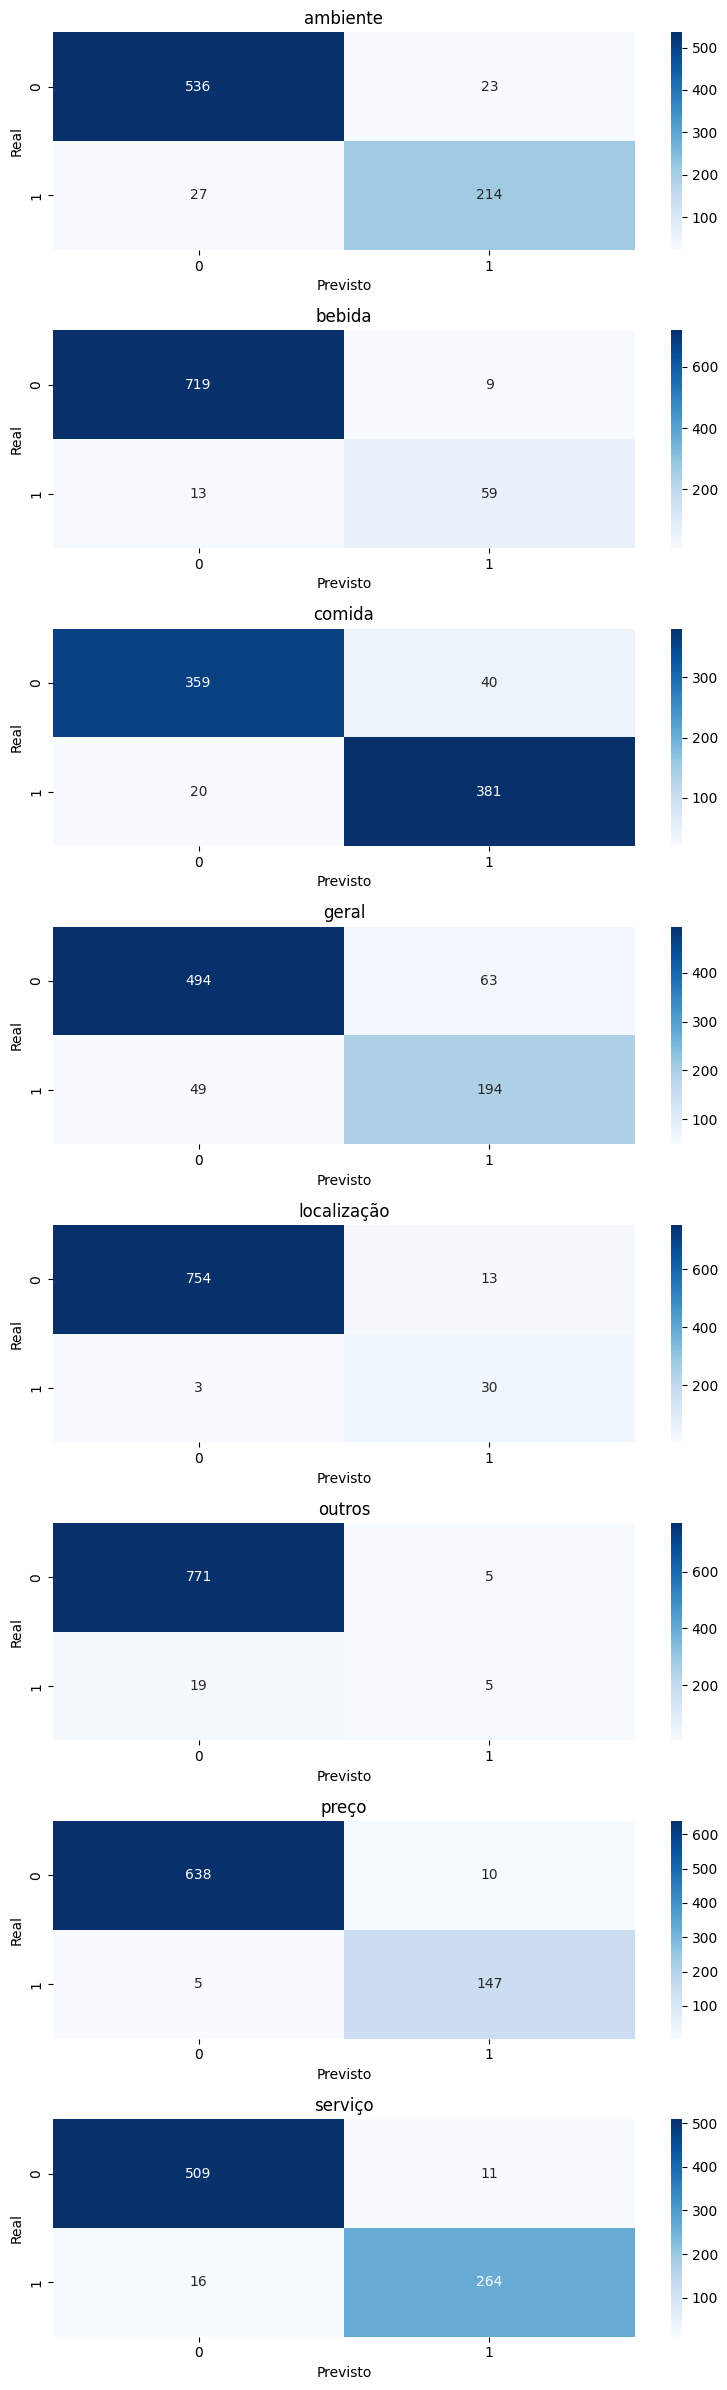

In [41]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## 3° Fold

In [42]:
# Dividir o dataset
df = pd.concat([df_fold2, df_fold1, df_fold4, df_fold5])
train_data = df.dropna()
test_data = df_fold3.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [43]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [44]:
# Criar e treinar modelo
model = OneVsRestClassifier(LogisticRegression(C=10.0, max_iter=1000, penalty='l1', solver='liblinear', multi_class='ovr'))
model.fit(X_train_tfidf, y_train)

c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression(C=10.0, max_iter=1000,
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear'))

In [45]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [46]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 3° Fold:", accuracy)
print("F1 Score Macro do 3° Fold:", f1_score_macro)
print("Precisão Macro do 3° Fold:", precision_macro)
print("Revocação Macro do 3° Fold:", recall_macro)
print("F1 Score Micro do 3° Fold:", f1_score_micro)
print("Precisão Micro do 3° Fold:", precision_micro)
print("Revocação Micro do 3° Fold:", recall_micro)

Acurácia do 3° Fold: 0.70125
F1 Score Macro do 3° Fold: 0.8324639565051685
Precisão Macro do 3° Fold: 0.8822800651797604
Revocação Macro do 3° Fold: 0.820483635911236
F1 Score Micro do 3° Fold: 0.901296111665005
Precisão Micro do 3° Fold: 0.904
Revocação Micro do 3° Fold: 0.8986083499005965


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.96      0.91      0.93       245
      bebida       0.87      0.89      0.88        83
      comida       0.91      0.93      0.92       424
       geral       0.77      0.80      0.78       254
 localização       0.98      0.96      0.97        48
      outros       0.67      0.17      0.27        24
       preço       0.94      0.94      0.94       161
     serviço       0.97      0.96      0.96       270

   micro avg       0.90      0.90      0.90      1509
   macro avg       0.88      0.82      0.83      1509
weighted avg       0.90      0.90      0.90      1509
 samples avg       0.88      0.89      0.87      1509



c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

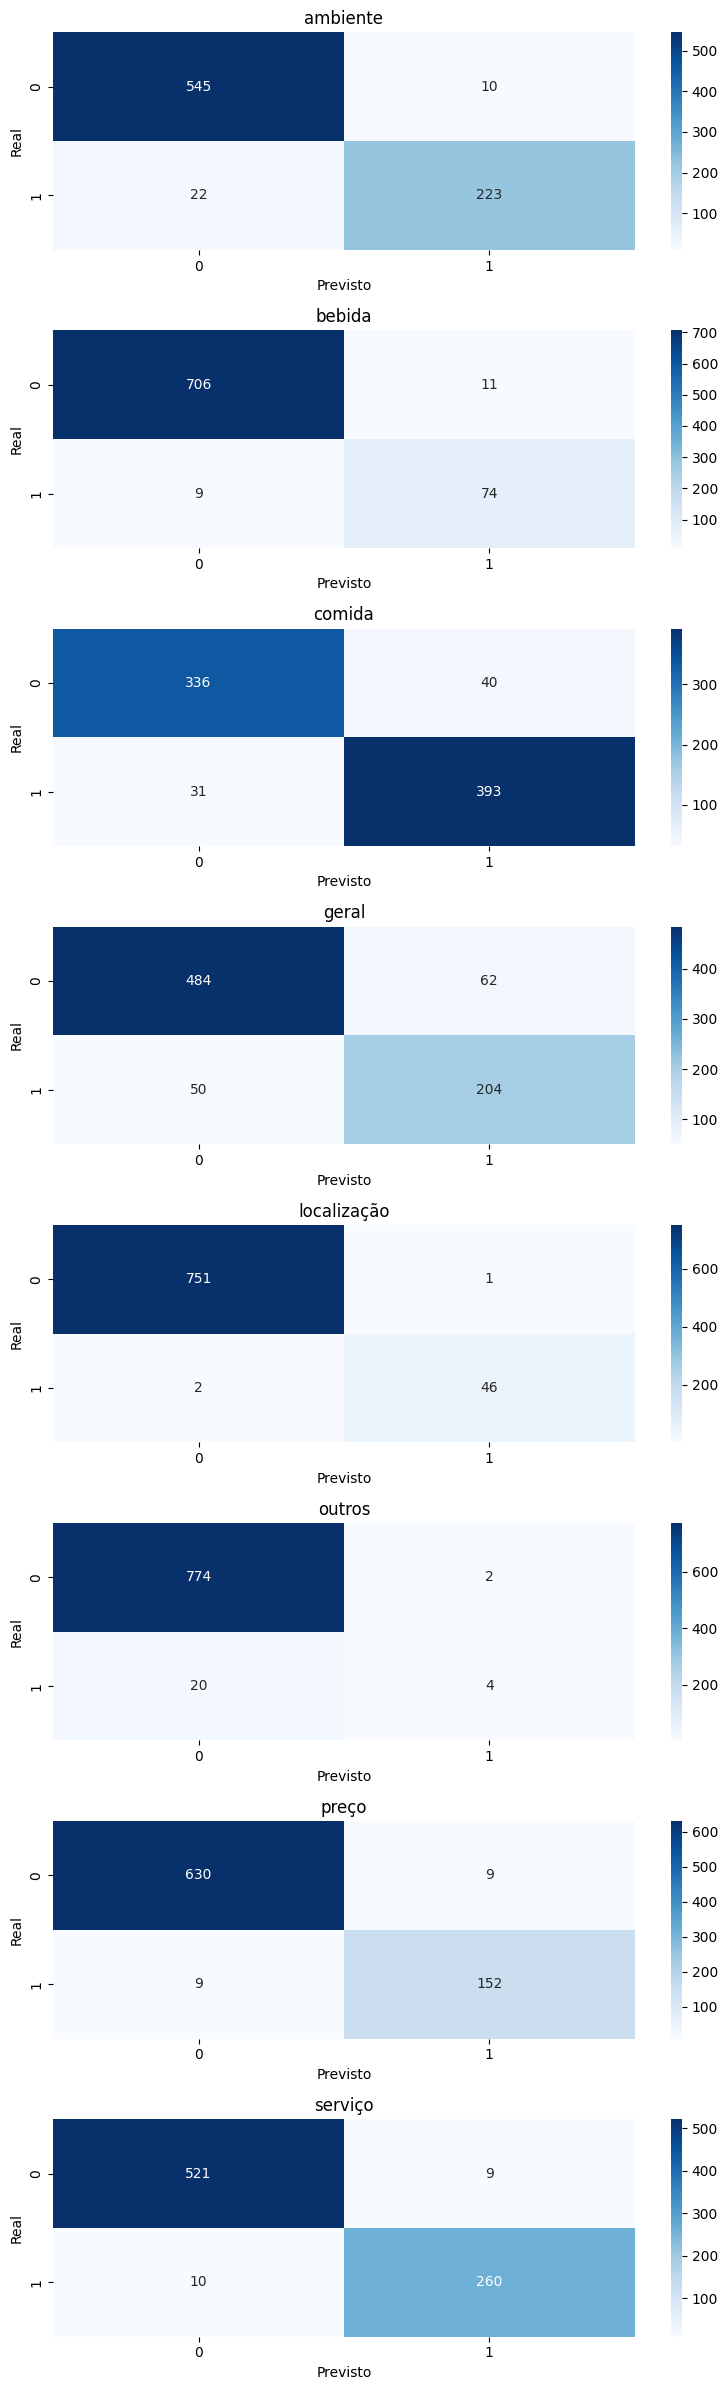

In [48]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## 4° Fold

In [49]:
# Dividir o dataset
df = pd.concat([df_fold2, df_fold3, df_fold1, df_fold5])
train_data = df.dropna()
test_data = df_fold4.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [50]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [51]:
# Criar e treinar modelo
model = OneVsRestClassifier(LogisticRegression(C=10.0, max_iter=1000, penalty='l1', solver='liblinear', multi_class='ovr'))
model.fit(X_train_tfidf, y_train)

c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression(C=10.0, max_iter=1000,
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear'))

In [52]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [53]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 4° Fold:", accuracy)
print("F1 Score Macro do 4° Fold:", f1_score_macro)
print("Precisão Macro do 4° Fold:", precision_macro)
print("Revocação Macro do 4° Fold:", recall_macro)
print("F1 Score Micro do 4° Fold:", f1_score_micro)
print("Precisão Micro do 4° Fold:", precision_micro)
print("Revocação Micro do 4° Fold:", recall_micro)

Acurácia do 4° Fold: 0.685
F1 Score Macro do 4° Fold: 0.8018990537124506
Precisão Macro do 4° Fold: 0.8310198776866753
Revocação Macro do 4° Fold: 0.7876639921269855
F1 Score Micro do 4° Fold: 0.8968698517298188
Precisão Micro do 4° Fold: 0.9067288474350433
Revocação Micro do 4° Fold: 0.8872229465449805


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.93      0.90      0.92       264
      bebida       0.89      0.89      0.89        93
      comida       0.92      0.93      0.92       431
       geral       0.75      0.74      0.75       246
 localização       0.95      0.85      0.90        48
      outros       0.25      0.06      0.10        16
       preço       0.98      0.98      0.98       143
     serviço       0.98      0.94      0.96       293

   micro avg       0.91      0.89      0.90      1534
   macro avg       0.83      0.79      0.80      1534
weighted avg       0.90      0.89      0.89      1534
 samples avg       0.87      0.88      0.86      1534



c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

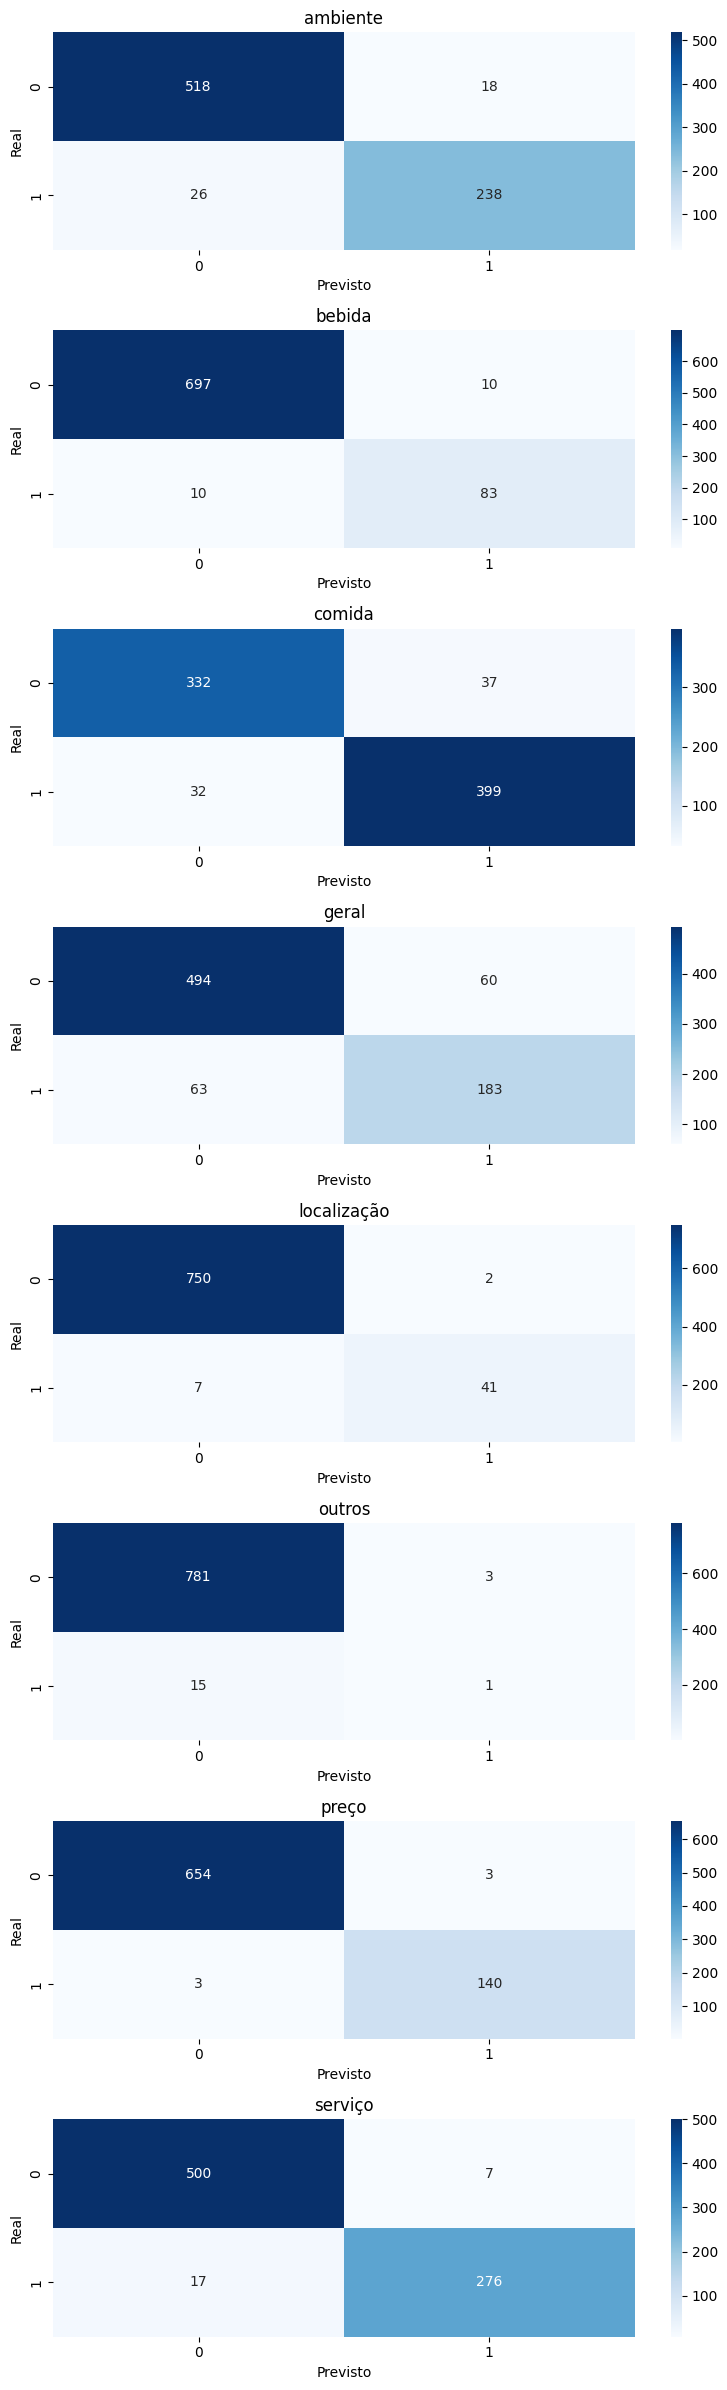

In [55]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## 5° Fold

In [56]:
# Dividir o dataset
df = pd.concat([df_fold2, df_fold3, df_fold4, df_fold1])
train_data = df.dropna()
test_data = df_fold5.dropna()

X_train = train_data['sentenca']
y_train = train_data.drop('sentenca', axis=1)
X_test = test_data['sentenca']
y_test = test_data.drop('sentenca', axis=1)

In [57]:
# Converta as sentenças em vetores de recursos TF-IDF usando o TfidfVectorizer:
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [58]:
# Criar e treinar modelo
model = OneVsRestClassifier(LogisticRegression(C=10.0, max_iter=1000, penalty='l1', solver='liblinear', multi_class='ovr'))
model.fit(X_train_tfidf, y_train)

c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression(C=10.0, max_iter=1000,
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear'))

In [59]:
# Teste do modelo
predictions = model.predict(X_test_tfidf)

### Resultados

In [60]:
from sklearn.metrics import f1_score

# Resultados
predictions_df = pd.DataFrame(predictions) 
y_pred = predictions_df.values # Obter as previsões
y_true = y_test # Obter os rótulos reais dos dados de teste

accuracy = accuracy_score(y_true, y_pred)
f1_score_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_score_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Adicionar valores das métricas para lista
accuracies.append(accuracy)
f1_score_list_macro.append(f1_score_macro)
precision_list_macro.append(precision_macro)
recall_list_macro.append(recall_macro)
f1_score_list_micro.append(f1_score_micro)
precision_list_micro.append(precision_micro)
recall_list_micro.append(recall_micro)

print("Acurácia do 5° Fold:", accuracy)
print("F1 Score Macro do 5° Fold:", f1_score_macro)
print("Precisão Macro do 5° Fold:", precision_macro)
print("Revocação Macro do 5° Fold:", recall_macro)
print("F1 Score Micro do 5° Fold:", f1_score_micro)
print("Precisão Micro do 5° Fold:", precision_micro)
print("Revocação Micro do 5° Fold:", recall_micro)

Acurácia do 5° Fold: 0.68625
F1 Score Macro do 5° Fold: 0.8203357272577714
Precisão Macro do 5° Fold: 0.8602707910708205
Revocação Macro do 5° Fold: 0.8012812965657868
F1 Score Micro do 5° Fold: 0.8906937394247038
Precisão Micro do 5° Fold: 0.8970688479890934
Revocação Micro do 5° Fold: 0.8844086021505376


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']))

              precision    recall  f1-score   support

    ambiente       0.92      0.87      0.90       238
      bebida       0.87      0.89      0.88        74
      comida       0.91      0.90      0.91       417
       geral       0.78      0.79      0.78       244
 localização       0.87      0.79      0.82        42
      outros       0.62      0.25      0.36        20
       preço       0.97      0.95      0.96       167
     serviço       0.95      0.96      0.95       286

   micro avg       0.90      0.88      0.89      1488
   macro avg       0.86      0.80      0.82      1488
weighted avg       0.90      0.88      0.89      1488
 samples avg       0.87      0.88      0.86      1488



c:\VSCODEProjects\artigo-classificador_multilabel\env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Matriz de Confusão

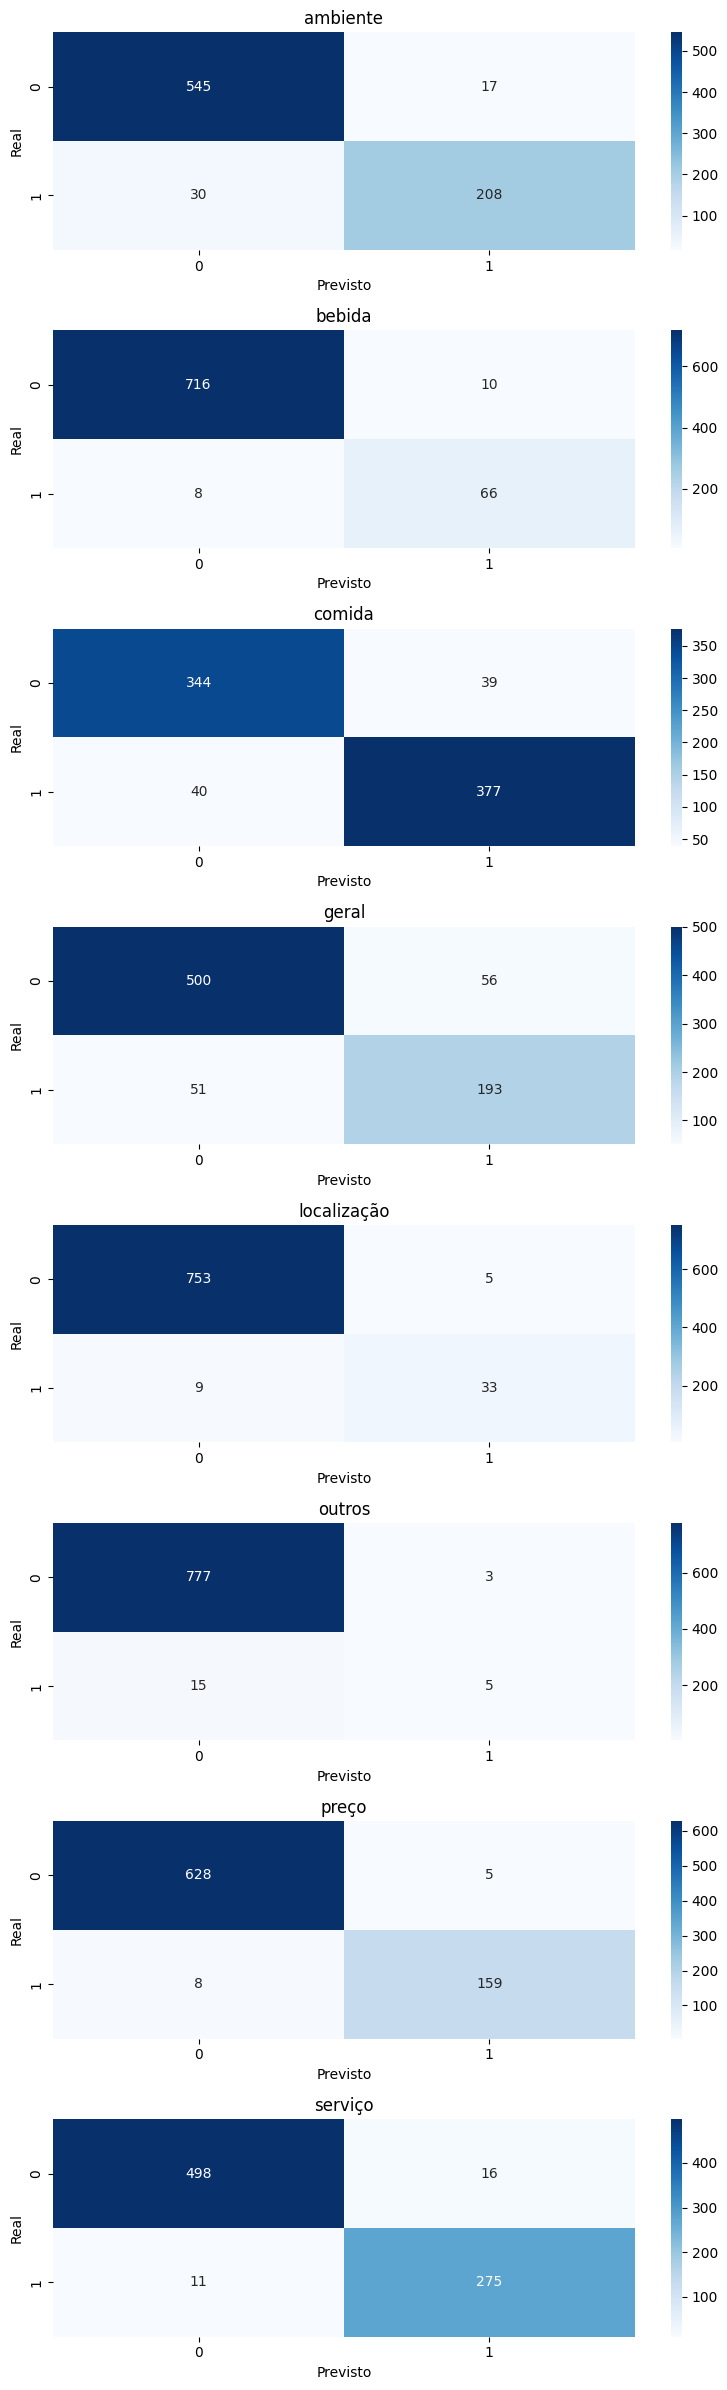

In [62]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define as categorias correspondentes aos rótulos
category_id_df = pd.DataFrame({'categoria': labels, 'id': range(len(labels))})

# cria a matriz de confusão
conf_mat = multilabel_confusion_matrix(y_true, y_pred)

# plota as matrizes de confusão separadamente para cada categoria
fig, axes = plt.subplots(nrows=len(category_id_df), ncols=1, figsize=(8, 24))
for i, ax in enumerate(axes.flat):
    sns.heatmap(conf_mat[i], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set(xlabel='Previsto', ylabel='Real', title=category_id_df.iloc[i]['categoria'])
plt.tight_layout()
plt.show()



## Resultado Geral Logistic Regression com Validação Cruzada

In [63]:
# Imprimir as métricas médias obtidas nas 5 partições
print("Acurácia média:", sum(accuracies) / len(accuracies))
print("F1 Score Macro médio:", sum(f1_score_list_macro) / len(f1_score_list_macro))
print("Precisão Macro média:", sum(precision_list_macro) / len(precision_list_macro))
print("Revocação Macro média:", sum(recall_list_macro) / len(recall_list_macro))
print("F1 Score Micro médio:", sum(f1_score_list_micro) / len(f1_score_list_micro))
print("Precisão Micro média:", sum(precision_list_micro) / len(precision_list_micro))
print("Revocação Micro média:", sum(recall_list_micro) / len(recall_list_micro))

Acurácia média: 0.6925
F1 Score Macro médio: 0.8171332678699001
Precisão Macro média: 0.862875460364465
Revocação Macro média: 0.8111164939469532
F1 Score Micro médio: 0.8927113864592936
Precisão Micro média: 0.8923686666296285
Revocação Micro média: 0.8931631646979564
